In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import warnings

warnings.filterwarnings('ignore')

In [10]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=180, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [3]:
adata = sc.read_10x_mtx(
    'small_data/',               # the directory with the `.mtx` file
     var_names='gene_symbols',   # use gene symbols for the variable names (variables-axis index)
     cache=True)

adata

... reading from cache file cache/small_data-matrix.h5ad


AnnData object with n_obs × n_vars = 24262 × 58347
    var: 'gene_ids'

In [4]:
cell_cycle_genes = [x.strip() for x in open('regev_lab_cell_cycle_genes.txt')]

In [5]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

filtered out 22431 genes that are detected in less than 3 cells
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.scale(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [8]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    385 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    385 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


computing PCA
    with n_comps=50
    finished (0:00:00)
... storing 'phase' as categorical


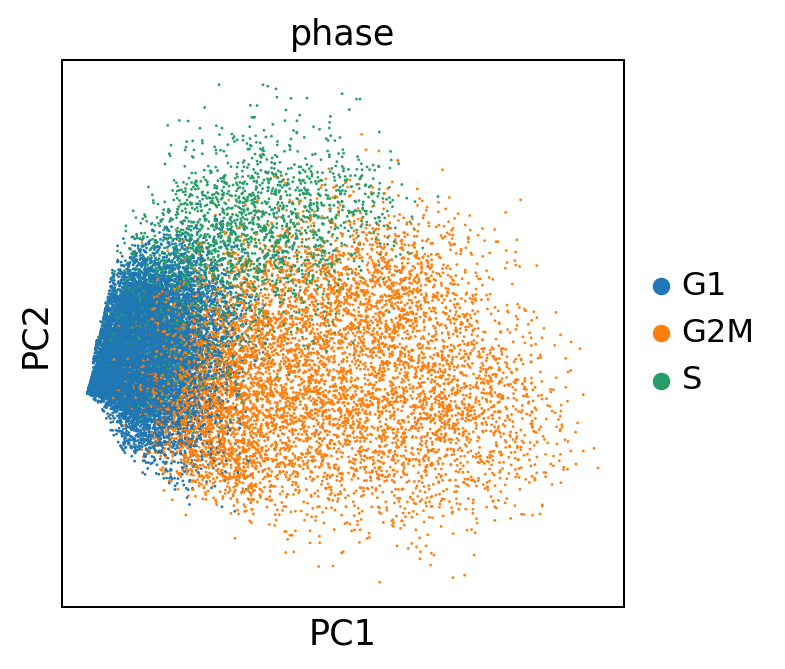

In [11]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [ ]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
sc.pp.scale(adata)

regressing out ['S_score', 'G2M_score']


In [ ]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')